In [41]:
import pandas as pd

In [42]:
data = pd.read_csv('/content/german_credit_data.csv')

In [43]:
data.isnull().any()

Unnamed: 0          False
Age                 False
Sex                 False
Job                 False
Housing             False
Saving accounts      True
Checking account     True
Credit amount       False
Duration            False
Purpose             False
dtype: bool

In [44]:
data.shape

(1000, 10)

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


In [46]:
data.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

#Removing NULL values 'IterativeImputer' and 'KNN imputer' from scikit-learn, and for encoding Weight of Evidence(WOE) method and also created a credit risk column as target column  .

In [47]:
pip install scikit-learn


In [48]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

df = pd.read_csv('german_credit_data.csv')

# Display the column names in your dataset
print("Column names in the dataset:")
print(df.columns)

# Identify missing values
print("\nMissing values before imputation:")
print(df.isnull().sum())

# Separate numerical and categorical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Perform Iterative Imputation on numerical columns
iterative_imputer = IterativeImputer(max_iter=10, random_state=0)
df[numerical_columns] = iterative_imputer.fit_transform(df[numerical_columns])

# Create a 'credit_risk' column based on credit_amount and duration
threshold_credit_amount = 5000
threshold_duration = 24

df['credit_risk'] = np.where((df['Credit amount'] > threshold_credit_amount) & (df['Duration'] > threshold_duration), 1, 0)

# WOE encoding for categorical columns
def calculate_woe(df, column, target_column):
    df = df[[column, target_column]].copy()
    df['good'] = (df[target_column] == 0).astype(int)
    df['bad'] = (df[target_column] == 1).astype(int)

    total_good = df['good'].sum()
    total_bad = df['bad'].sum()

    grouped = df.groupby(column)
    woe = pd.Series()

    for category, group in grouped:
        good = group['good'].sum()
        bad = group['bad'].sum()

        if good == 0:
            good_percentage = 0.5  # Adjust for log(0)
        else:
            good_percentage = good / total_good

        if bad == 0:
            bad_percentage = 0.5  # Adjust for log(0)
        else:
            bad_percentage = bad / total_bad

        woe_value = np.log(good_percentage / bad_percentage)
        woe[category] = woe_value

    return woe

# Apply WOE encoding to categorical columns
woe_encodings = {}
for column in categorical_columns:
    woe = calculate_woe(df, column, 'credit_risk')
    woe_encodings[column] = woe

# Map WOE values to the corresponding categories in the dataset
for column, woe in woe_encodings.items():
    df[column] = df[column].map(woe)

# Perform KNN Imputation on the entire dataset
knn_imputer = KNNImputer(n_neighbors=5)
data = pd.DataFrame(knn_imputer.fit_transform(df), columns=df.columns)

# Display the dataset after creating 'credit_risk' column and applying WOE encoding
print("\nDataset after creating 'credit_risk' column and applying WOE encoding:")
print(data.head())

# Verify if there are any missing values remaining
print("\nMissing values after imputation:")
print(data.isnull().sum())


Column names in the dataset:
Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose'],
      dtype='object')

Missing values before imputation:
Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

Dataset after creating 'credit_risk' column and applying WOE encoding:
   Unnamed: 0   Age       Sex  Job   Housing  Saving accounts  \
0         0.0  67.0 -0.120400  2.0  0.156309         0.349186   
1         1.0  22.0  0.315974  2.0  0.156309         0.091205   
2         2.0  49.0 -0.120400  1.0  0.156309         0.091205   
3         3.0  45.0 -0.120400  2.0 -0.999573         0.091205   
4         4.0  53.0 -0.120400  2.0 -0.999573         0.091205   

   Checking account  Credit amount  Duration   Purpose  cr

<ipython-input-48-34659f369eb8>:41: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  woe = pd.Series()
<ipython-input-48-34659f369eb8>:41: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  woe = pd.Series()
<ipython-input-48-34659f369eb8>:41: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  woe = pd.Series()
<ipython-input-48-34659f369eb8>:41: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  woe = pd.Series()
<ipython-input-48-34659f369eb8>:41: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a fut

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1000 non-null   float64
 1   Age               1000 non-null   float64
 2   Sex               1000 non-null   float64
 3   Job               1000 non-null   float64
 4   Housing           1000 non-null   float64
 5   Saving accounts   1000 non-null   float64
 6   Checking account  1000 non-null   float64
 7   Credit amount     1000 non-null   float64
 8   Duration          1000 non-null   float64
 9   Purpose           1000 non-null   float64
 10  credit_risk       1000 non-null   float64
dtypes: float64(11)
memory usage: 86.1 KB


In [50]:
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,credit_risk
0,0.0,67.0,-0.120400,2.0,0.156309,0.349186,-0.000806,1169.0,6.0,0.664997,0.0
1,1.0,22.0,0.315974,2.0,0.156309,0.091205,-0.295750,5951.0,48.0,0.664997,1.0
2,2.0,49.0,-0.120400,1.0,0.156309,0.091205,0.232895,2096.0,12.0,-0.365849,0.0
3,3.0,45.0,-0.120400,2.0,-0.999573,0.091205,-0.000806,7882.0,42.0,0.523852,1.0
4,4.0,53.0,-0.120400,2.0,-0.999573,0.091205,-0.000806,4870.0,24.0,-0.230918,0.0


In [51]:
from sklearn.preprocessing import StandardScaler

numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns


numerical_columns_without_credit_risk = numerical_columns.drop('credit_risk', errors='ignore')


scaler = StandardScaler()
data[numerical_columns_without_credit_risk] = scaler.fit_transform(data[numerical_columns_without_credit_risk])

# Display the dataset after scaling
print("\nDataset after scaling :")
print(data.head())




Dataset after scaling :
   Unnamed: 0       Age       Sex       Job   Housing  Saving accounts  \
0   -1.730320  2.766456 -0.670280  0.146949  0.267043         0.886254   
1   -1.726856 -1.191404  1.491914  0.146949  0.267043        -0.212451   
2   -1.723391  1.183312 -0.670280 -1.383771  0.267043        -0.212451   
3   -1.719927  0.831502 -0.670280  0.146949 -2.843292        -0.212451   
4   -1.716463  1.535122 -0.670280  0.146949 -2.843292        -0.212451   

   Checking account  Credit amount  Duration   Purpose  credit_risk  
0         -0.052411      -0.745131 -1.236478  0.920110          0.0  
1         -0.747634       0.949817  2.248194  0.920110          1.0  
2          0.498454      -0.416562 -0.738668 -0.623099          0.0  
3         -0.052411       1.634247  1.750384  0.708811          1.0  
4         -0.052411       0.566664  0.256953 -0.421103          0.0  


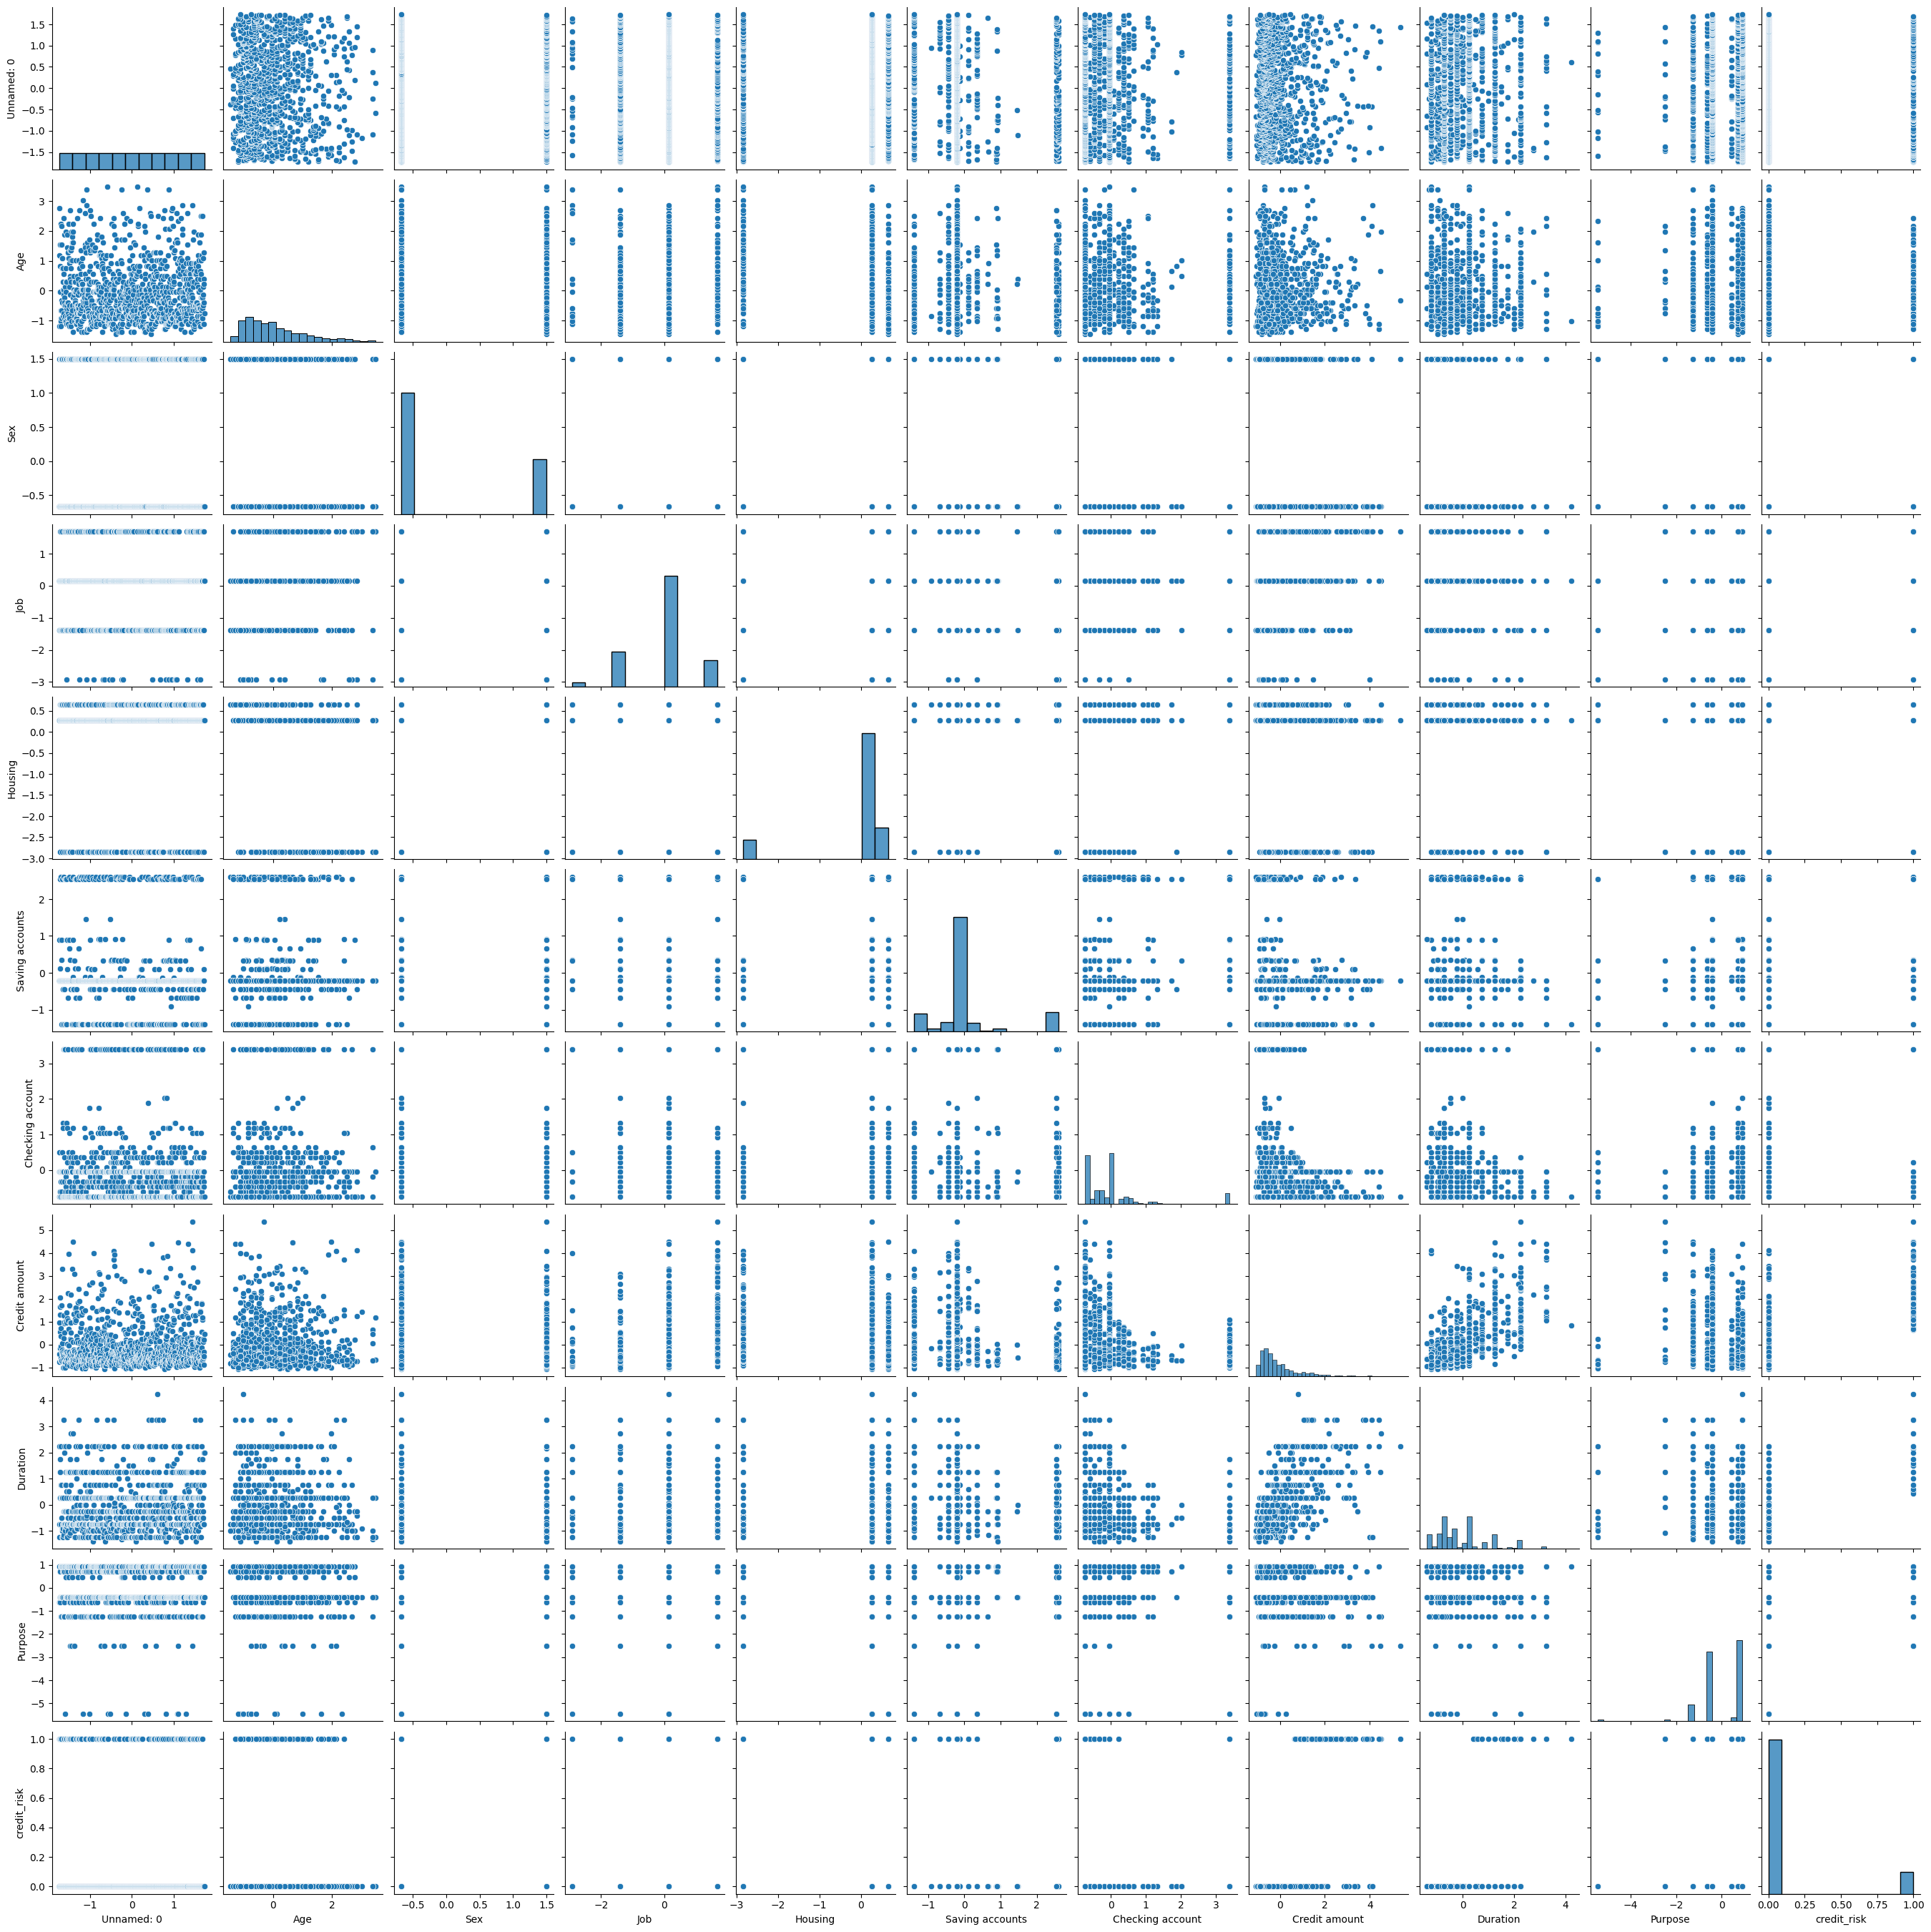

In [52]:
import seaborn as sns
sns.pairplot(data)

<Axes: >

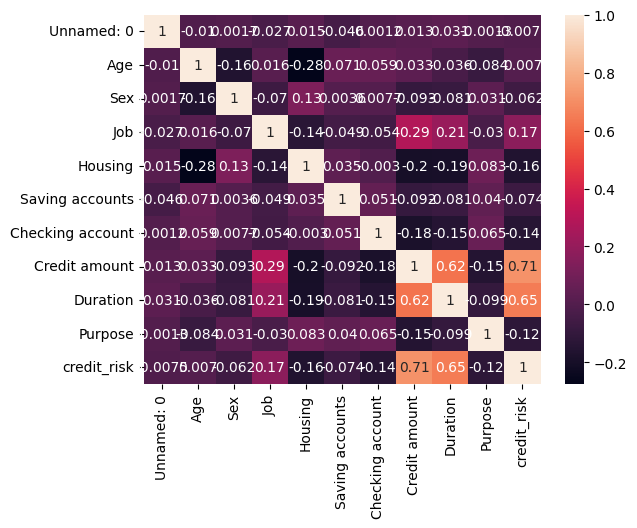

In [53]:
sns.heatmap(data.corr(),annot=True)

<Axes: xlabel='Credit amount', ylabel='credit_risk'>

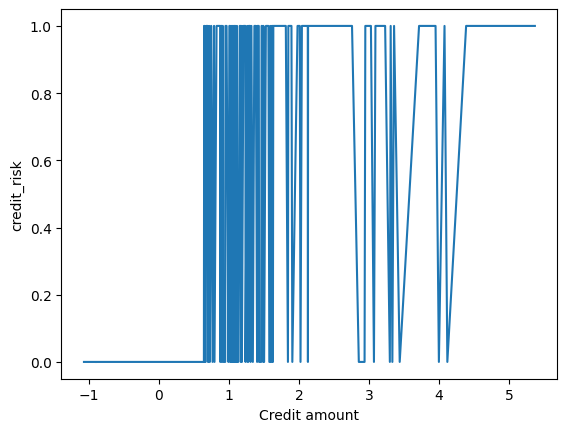

In [54]:
sns.lineplot(x = data['Credit amount'],y=data['credit_risk'])

<Axes: xlabel='Duration', ylabel='credit_risk'>

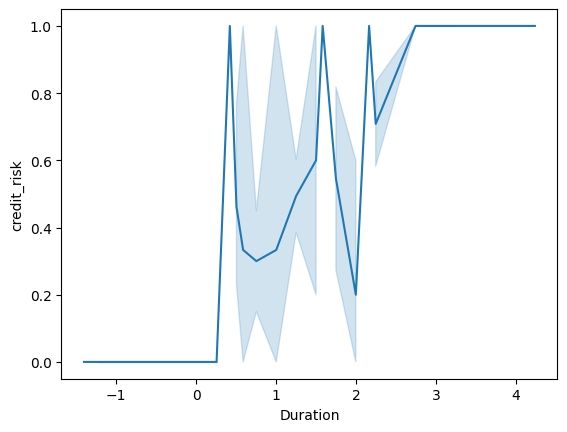

In [55]:
sns.lineplot(x = data['Duration'],y=data['credit_risk'])

In [56]:
from sklearn.model_selection import train_test_split
X = data.drop('credit_risk', axis=1)
y = data['credit_risk']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
y.isnull().sum()

0

In [58]:
y.head()

0    0.0
1    1.0
2    0.0
3    1.0
4    0.0
Name: credit_risk, dtype: float64

###Feature Selection using Genetic Algorithm with ACO (Ant Colony Optimisation)

In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

def evaluate_features(selected_features, X_train, X_test, y_train, y_test):
    if not selected_features:
        return 100000,  # A high error if no features are selected

    # Train a random forest regressor on the selected features
    clf = RandomForestRegressor(n_estimators=100, random_state=42)
    clf.fit(X_train.iloc[:, selected_features], y_train)

    # Make predictions and calculate mean squared error
    y_pred = clf.predict(X_test.iloc[:, selected_features])
    mse = mean_squared_error(y_test, y_pred)
    return mse,

In [60]:
def aco_feature_selection(X_train, X_test, y_train, y_test, n_ants=10, n_iterations=10):
    n_features = X_train.shape[1]
    best_feature_subset = []

    for _ in range(n_iterations):
        pheromone = np.ones(n_features)
        selected_features = []

        for _ in range(n_ants):
            available_features = [i for i in range(n_features) if i not in selected_features]

            # Check if there are available features to select
            if not available_features:
                break

            probabilities = pheromone[available_features] / sum(pheromone[available_features])
            selected_feature = np.random.choice(available_features, p=probabilities)
            selected_features.append(selected_feature)

        # Check if any features were selected by any ant
        if not selected_features:
            continue

        mse = evaluate_features(selected_features, X_train, X_test, y_train, y_test)[0]

        if not best_feature_subset or mse < best_mse:
            best_mse = mse
            best_feature_subset = selected_features

        # Update pheromone levels based on the best subset found
        pheromone[best_feature_subset] += 1 / best_mse

    return best_feature_subset

In [61]:
!pip install deap

In [62]:
import random
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from deap import base, creator, tools, algorithms

In [63]:
# Genetic Algorithm parameters
pop_size = 50
cxpb = 0.7
mutpb = 0.2
ngen = 20

# ACO parameters
n_ants = 10
n_iterations = 10

# Run ACO for feature selection
best_feature_subset = aco_feature_selection(X_train, X_test, y_train, y_test, n_ants, n_iterations)

# Run the genetic algorithm on the selected feature subset
X_train_selected = X_train.iloc[:, best_feature_subset]
X_test_selected = X_test.iloc[:, best_feature_subset]

In [64]:
# Create a fitness function
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
# Create the individual class
creator.create("Individual", list, fitness=creator.FitnessMin)

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [65]:
# Create a fitness function
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
# Create the individual class
creator.create("Individual", list, fitness=creator.FitnessMin)

In [66]:
# Initialize the genetic algorithm toolbox
toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, len(best_feature_subset))
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evaluate_features, X_train=X_train_selected, X_test=X_test_selected, y_train=y_train, y_test=y_test)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

In [67]:
# Run the genetic algorithm
population = toolbox.population(n=pop_size)
algorithms.eaMuPlusLambda(population, toolbox, mu=pop_size, lambda_=pop_size, cxpb=cxpb, mutpb=mutpb, ngen=ngen, stats=None, halloffame=None, verbose=True)

# Get the best individual
best_individual = tools.selBest(population, k=1)[0]
# selected_features = [best_feature_subset[i] for i, selected in enumerate(best_individual) if selected]
selected_features = [col for i, col in enumerate(X_train.columns) if best_individual[i] == 1]
print("Best feature subset:", selected_features)

gen	nevals
0  	50    
1  	40    
2  	46    
3  	47    
4  	48    
5  	46    
6  	41    
7  	42    
8  	42    
9  	44    
10 	43    
11 	49    
12 	43    
13 	46    
14 	49    
15 	45    
16 	44    
17 	42    
18 	46    
19 	44    
20 	44    
Best feature subset: ['Unnamed: 0', 'Age', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Credit amount', 'Purpose']


#Feature Optimisation PCA+lasso regression

> Indented block




In [68]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming your dataset is 'data'
X = data.drop('credit_risk', axis=1)  # Features
y = data['credit_risk']  # Target variable

# Number of Monte Carlo Cross-Validation splits
n_splits = 5

# Initialize PCA and Lasso models
pca = PCA(n_components=0.95)  # Retain 95% of variance
lasso = LassoCV(cv=5)

# Initialize lists to store selected features and MSE scores
selected_features_optimized_list = []
mse_scores = []

# Perform Monte Carlo Cross-Validation
for _ in range(n_splits):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=np.random.randint(1000))

    # Standardize the selected features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Perform PCA for dimensionality reduction
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Perform Lasso (L1 regularization) for feature selection
    lasso.fit(X_train_pca, y_train)

    # Get the selected features after Lasso regularization
    selected_features_optimized = [col for col, coef in zip(X.columns, lasso.coef_) if coef != 0]

    # Display the selected features after optimization
    print("Selected features after PCA and Lasso optimization:", selected_features_optimized)

    # Evaluate the performance on the test set
    y_pred = lasso.predict(X_test_pca)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

    # Append the selected features to the list
    selected_features_optimized_list.append(selected_features_optimized)

# Display average MSE scores across Monte Carlo splits
print("\nAverage MSE scores:", np.mean(mse_scores))

# Display the final list of selected features after optimization
print("\nFinal selected features after optimization (across Monte Carlo splits):")
for idx, features in enumerate(selected_features_optimized_list):
    print(f"Iteration {idx + 1}: {features}")


Selected features after PCA and Lasso optimization: ['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Credit amount', 'Duration']
Selected features after PCA and Lasso optimization: ['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Credit amount', 'Duration']
Selected features after PCA and Lasso optimization: ['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Credit amount', 'Duration']
Selected features after PCA and Lasso optimization: ['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Credit amount', 'Duration']
Selected features after PCA and Lasso optimization: ['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Credit amount', 'Duration']

Average MSE scores: 0.047861454452846106

Final selected features after optimization (across Monte Carlo splits):
Iteration 1: ['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving ac

In [69]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, SimpleRNN, Dense, Dropout
from sklearn.utils import shuffle

# Assuming df is the preprocessed DataFrame with the selected features
# X should contain the features, and y should contain the target variable 'credit_risk'
X = data[selected_features_optimized]  # Selected optimized features
y = data['credit_risk']  # Target variable


n_splits = 5
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for _ in range(n_splits):
    X, y = shuffle(X, y, random_state=np.random.randint(1000))
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=np.random.randint(1000))

    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Reshape the data for LSTM (assuming X_train_scaled and X_test_scaled are 2D arrays)
    X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
    X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

    # Build the hybrid model
    model = Sequential()
    model.add(LSTM(50, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, verbose=1)

    # Evaluate the model on the test set
    y_pred_prob = model.predict(X_test_reshaped)
    y_pred = (y_pred_prob > 0.5).astype(int)

    # Calculate and print evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    print("\nTest Set Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")

    # Store metrics for each iteration
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Display average metrics across Monte Carlo splits
print("\nAverage Metrics:")
print(f"Accuracy: {np.mean(accuracy_scores):.4f}")
print(f"F1 Score: {np.mean(f1_scores):.4f}")
print(f"Precision: {np.mean(precision_scores):.4f}")
print(f"Recall: {np.mean(recall_scores):.4f}")



Epoch 1/10
25/25 [==============================] - 2s 3ms/step - loss: 0.6521 - accuracy: 0.7800
Epoch 2/10
25/25 [==============================] - 0s 4ms/step - loss: 0.5851 - accuracy: 0.9062
Epoch 3/10
25/25 [==============================] - 0s 4ms/step - loss: 0.5208 - accuracy: 0.9237
Epoch 4/10
25/25 [==============================] - 0s 3ms/step - loss: 0.4524 - accuracy: 0.9325
Epoch 5/10
25/25 [==============================] - 0s 3ms/step - loss: 0.3845 - accuracy: 0.9438
Epoch 6/10
25/25 [==============================] - 0s 3ms/step - loss: 0.3252 - accuracy: 0.9488
Epoch 7/10
25/25 [==============================] - 0s 4ms/step - loss: 0.2759 - accuracy: 0.9513
Epoch 8/10
25/25 [==============================] - 0s 4ms/step - loss: 0.2343 - accuracy: 0.9600
Epoch 9/10
25/25 [==============================] - 0s 3ms/step - loss: 0.2035 - accuracy: 0.9625
Epoch 10/10
7/7 [==============================] - 0s 3ms/step

Test Set Metrics:
Accuracy: 0.9800
F1 Score: 0.9200
Pr

Epoch 1/10
20/20 [==============================] - 4s 41ms/step - loss: 0.6802 - accuracy: 0.5531 - val_loss: 0.6528 - val_accuracy: 0.7437
Epoch 2/10
20/20 [==============================] - 0s 5ms/step - loss: 0.6253 - accuracy: 0.8516 - val_loss: 0.6015 - val_accuracy: 0.9062
Epoch 3/10
20/20 [==============================] - 0s 5ms/step - loss: 0.5716 - accuracy: 0.9250 - val_loss: 0.5490 - val_accuracy: 0.9375
Epoch 4/10
20/20 [==============================] - 0s 5ms/step - loss: 0.5159 - accuracy: 0.9266 - val_loss: 0.4929 - val_accuracy: 0.9500
Epoch 5/10
20/20 [==============================] - 0s 6ms/step - loss: 0.4592 - accuracy: 0.9297 - val_loss: 0.4357 - val_accuracy: 0.9625
Epoch 6/10
20/20 [==============================] - 0s 5ms/step - loss: 0.4049 - accuracy: 0.9375 - val_loss: 0.3808 - val_accuracy: 0.9625
Epoch 7/10
20/20 [==============================] - 0s 5ms/step - loss: 0.3504 - accuracy: 0.9406 - val_loss: 0.3310 - val_accuracy: 0.9812
Epoch 8/10
20/20 [=

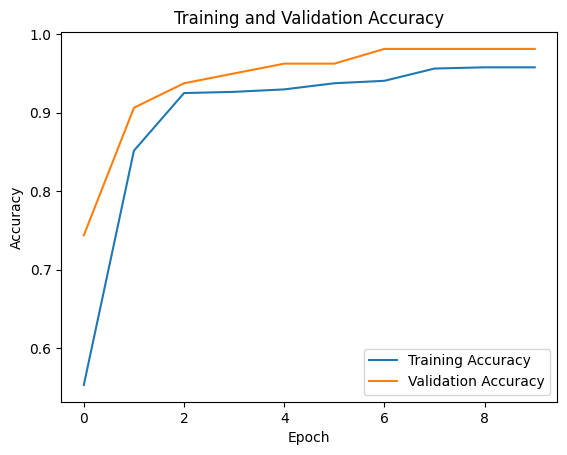

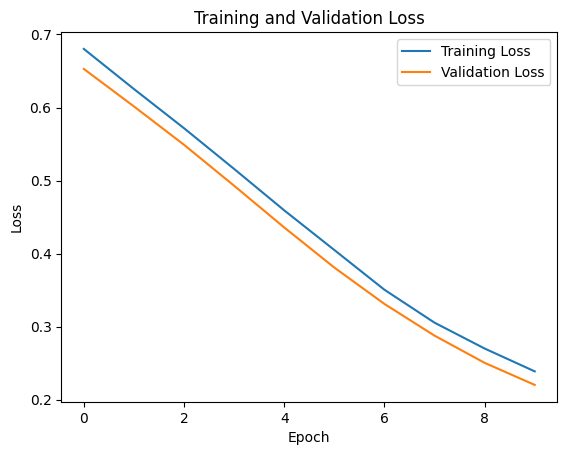

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

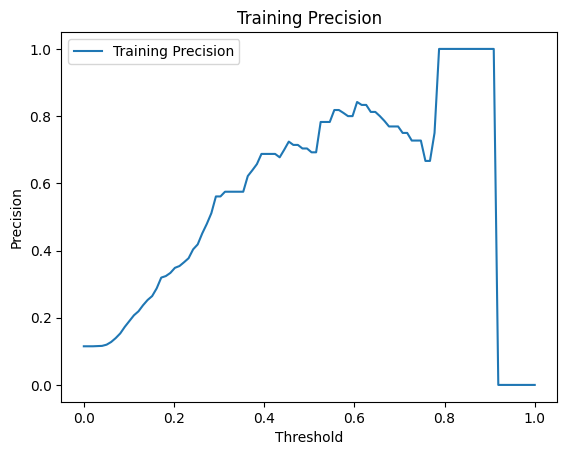

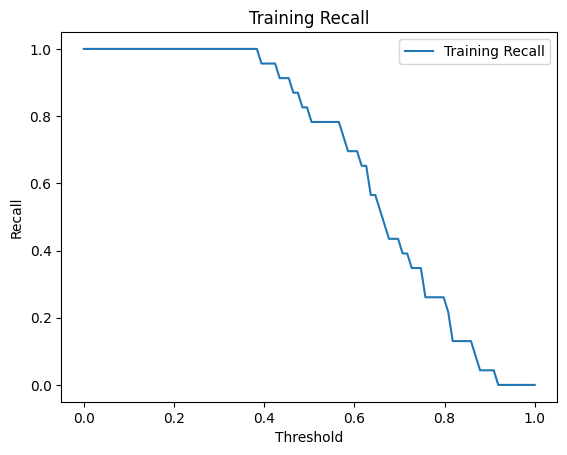

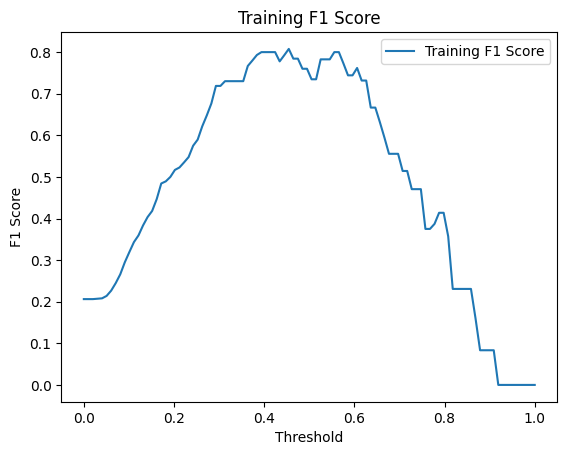

Epoch 1/10
20/20 [==============================] - 2s 31ms/step - loss: 0.6723 - accuracy: 0.6500 - val_loss: 0.6445 - val_accuracy: 0.8125
Epoch 2/10
20/20 [==============================] - 0s 5ms/step - loss: 0.6150 - accuracy: 0.8906 - val_loss: 0.5917 - val_accuracy: 0.9062
Epoch 3/10
20/20 [==============================] - 0s 5ms/step - loss: 0.5579 - accuracy: 0.9453 - val_loss: 0.5381 - val_accuracy: 0.9250
Epoch 4/10
20/20 [==============================] - 0s 5ms/step - loss: 0.5019 - accuracy: 0.9422 - val_loss: 0.4844 - val_accuracy: 0.9312
Epoch 5/10
20/20 [==============================] - 0s 5ms/step - loss: 0.4439 - accuracy: 0.9563 - val_loss: 0.4319 - val_accuracy: 0.9312
Epoch 6/10
20/20 [==============================] - 0s 5ms/step - loss: 0.3876 - accuracy: 0.9625 - val_loss: 0.3813 - val_accuracy: 0.9375
Epoch 7/10
20/20 [==============================] - 0s 7ms/step - loss: 0.3336 - accuracy: 0.9656 - val_loss: 0.3381 - val_accuracy: 0.9438
Epoch 8/10
20/20 [=

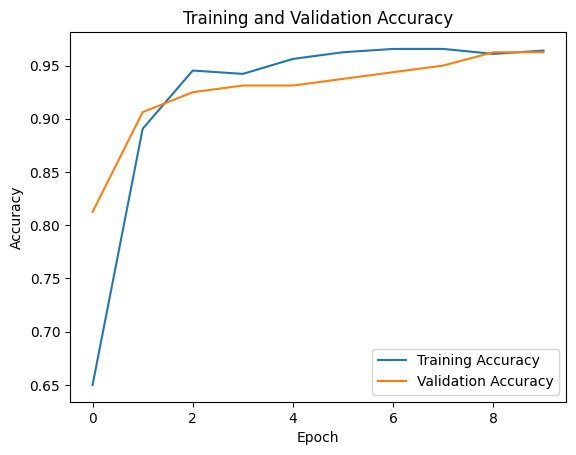

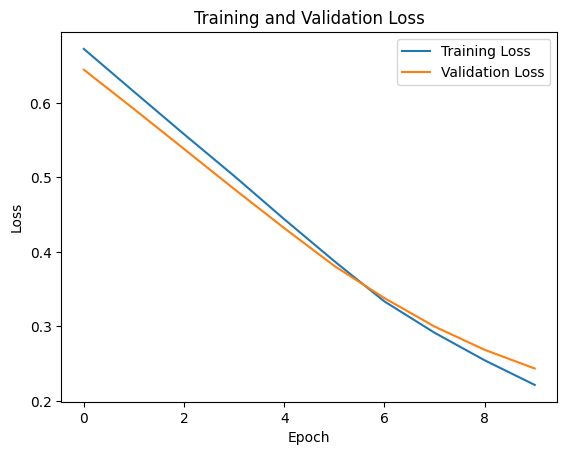

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

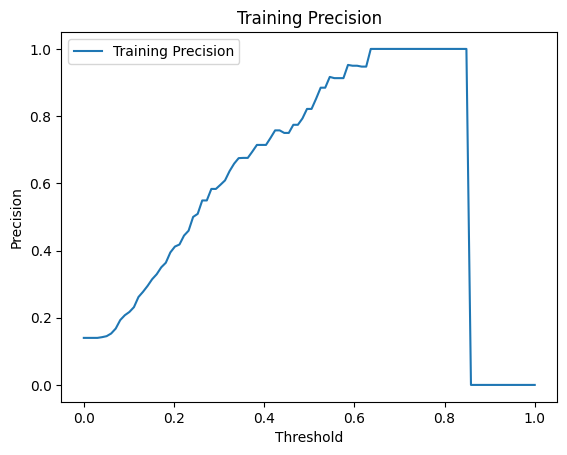

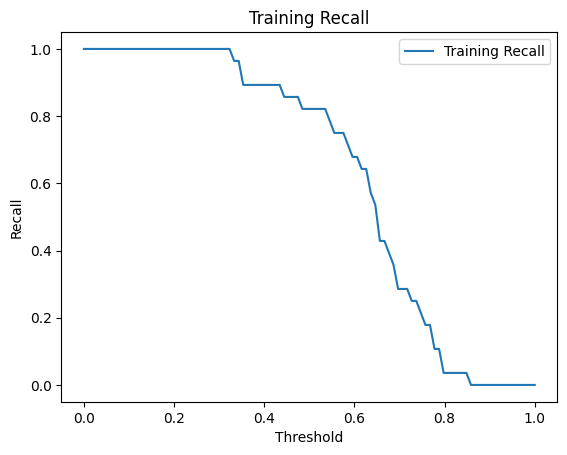

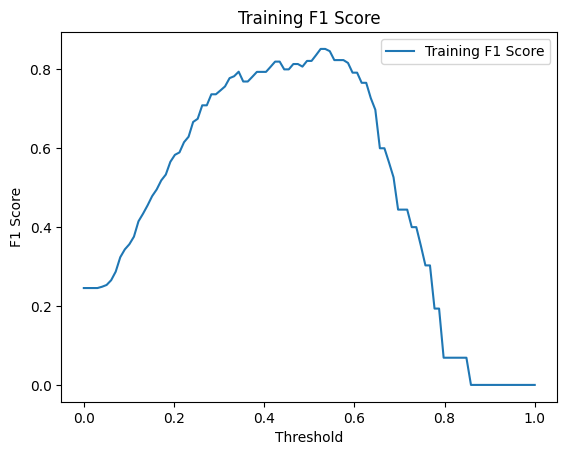

Epoch 1/10
20/20 [==============================] - 2s 31ms/step - loss: 0.6558 - accuracy: 0.7359 - val_loss: 0.6315 - val_accuracy: 0.8750
Epoch 2/10
20/20 [==============================] - 0s 6ms/step - loss: 0.5997 - accuracy: 0.8797 - val_loss: 0.5797 - val_accuracy: 0.8938
Epoch 3/10
20/20 [==============================] - 0s 6ms/step - loss: 0.5460 - accuracy: 0.9016 - val_loss: 0.5269 - val_accuracy: 0.9125
Epoch 4/10
20/20 [==============================] - 0s 6ms/step - loss: 0.4911 - accuracy: 0.9094 - val_loss: 0.4728 - val_accuracy: 0.9375
Epoch 5/10
20/20 [==============================] - 0s 6ms/step - loss: 0.4377 - accuracy: 0.9219 - val_loss: 0.4186 - val_accuracy: 0.9438
Epoch 6/10
20/20 [==============================] - 0s 6ms/step - loss: 0.3840 - accuracy: 0.9406 - val_loss: 0.3668 - val_accuracy: 0.9438
Epoch 7/10
20/20 [==============================] - 0s 6ms/step - loss: 0.3357 - accuracy: 0.9375 - val_loss: 0.3200 - val_accuracy: 0.9438
Epoch 8/10
20/20 [=

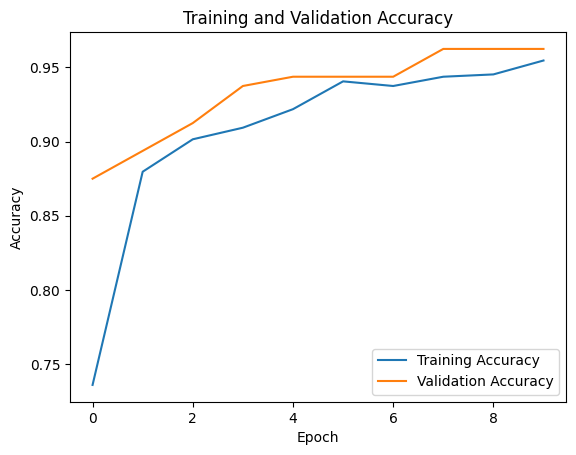

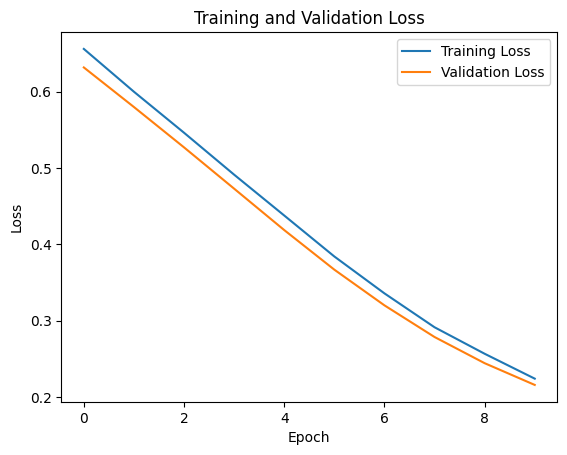

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

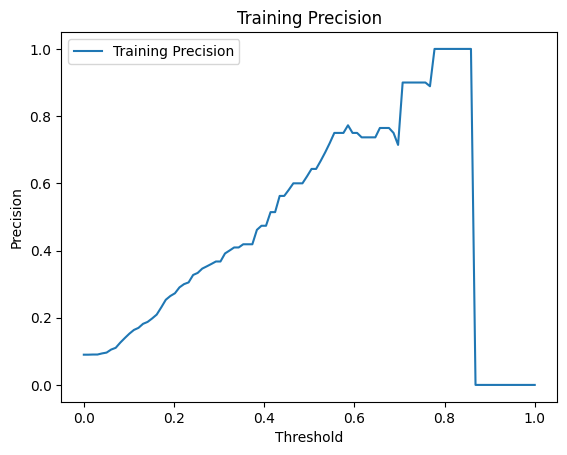

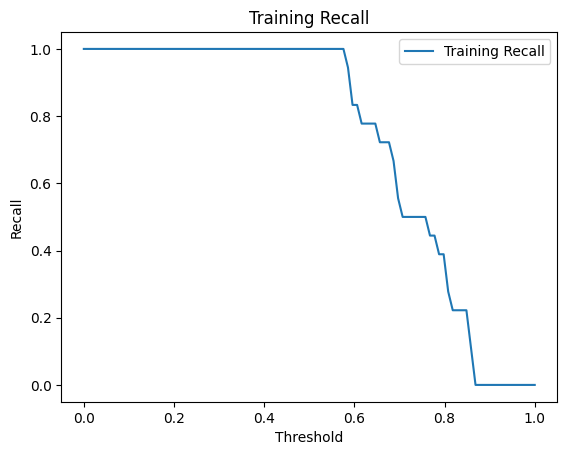

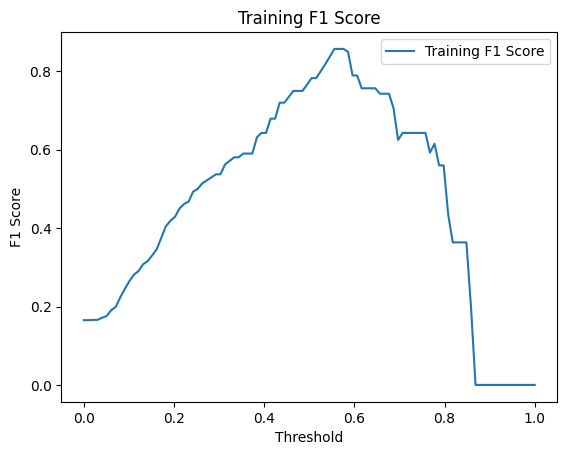

Epoch 1/10
20/20 [==============================] - 3s 44ms/step - loss: 0.6803 - accuracy: 0.6438 - val_loss: 0.6547 - val_accuracy: 0.7812
Epoch 2/10
20/20 [==============================] - 0s 8ms/step - loss: 0.6265 - accuracy: 0.8484 - val_loss: 0.6044 - val_accuracy: 0.8875
Epoch 3/10
20/20 [==============================] - 0s 7ms/step - loss: 0.5739 - accuracy: 0.9062 - val_loss: 0.5525 - val_accuracy: 0.9062
Epoch 4/10
20/20 [==============================] - 0s 7ms/step - loss: 0.5173 - accuracy: 0.9344 - val_loss: 0.4982 - val_accuracy: 0.9125
Epoch 5/10
20/20 [==============================] - 0s 7ms/step - loss: 0.4625 - accuracy: 0.9359 - val_loss: 0.4433 - val_accuracy: 0.9125
Epoch 6/10
20/20 [==============================] - 0s 7ms/step - loss: 0.4085 - accuracy: 0.9422 - val_loss: 0.3902 - val_accuracy: 0.9375
Epoch 7/10
20/20 [==============================] - 0s 7ms/step - loss: 0.3571 - accuracy: 0.9469 - val_loss: 0.3423 - val_accuracy: 0.9375
Epoch 8/10
20/20 [=

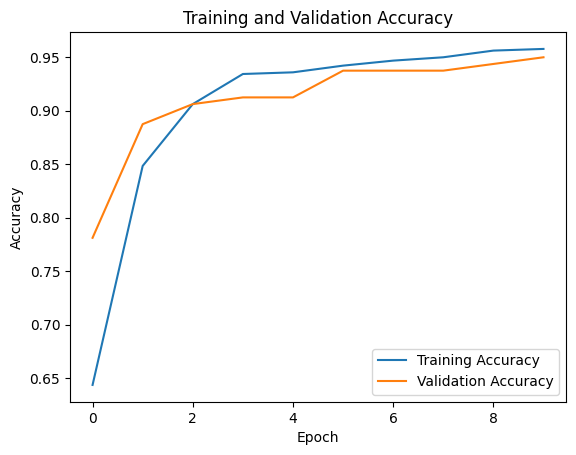

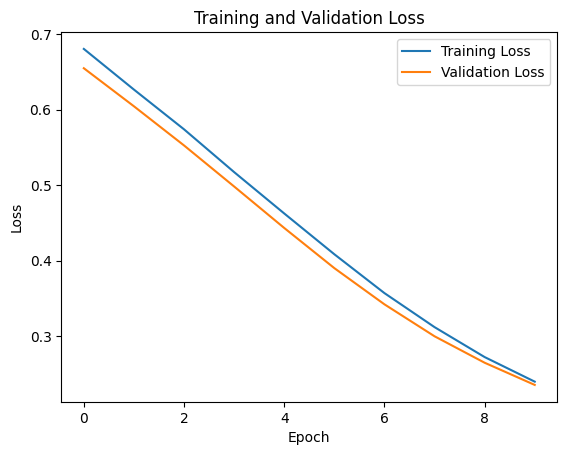

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

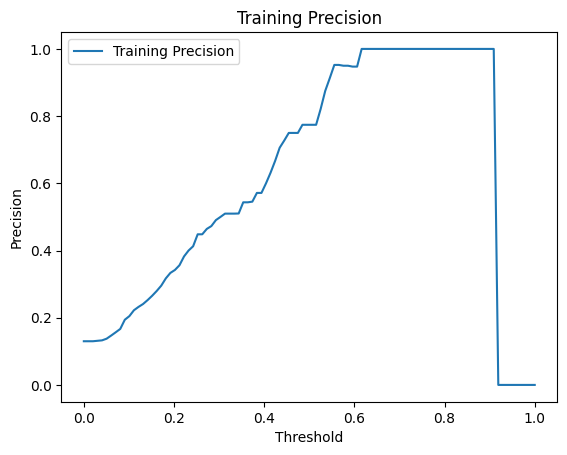

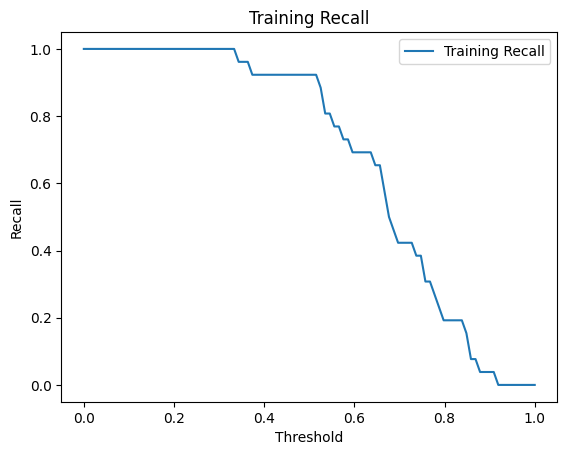

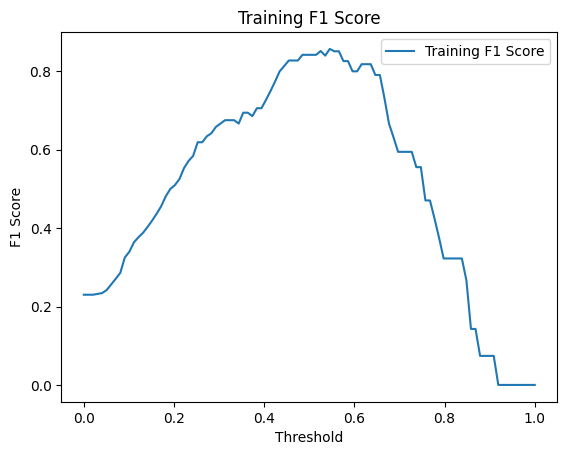

Epoch 1/10
20/20 [==============================] - 2s 31ms/step - loss: 0.6625 - accuracy: 0.7828 - val_loss: 0.6360 - val_accuracy: 0.8625
Epoch 2/10
20/20 [==============================] - 0s 6ms/step - loss: 0.6134 - accuracy: 0.8953 - val_loss: 0.5866 - val_accuracy: 0.9000
Epoch 3/10
20/20 [==============================] - 0s 5ms/step - loss: 0.5600 - accuracy: 0.9109 - val_loss: 0.5347 - val_accuracy: 0.9062
Epoch 4/10
20/20 [==============================] - 0s 6ms/step - loss: 0.5067 - accuracy: 0.9250 - val_loss: 0.4807 - val_accuracy: 0.9000
Epoch 5/10
20/20 [==============================] - 0s 6ms/step - loss: 0.4503 - accuracy: 0.9281 - val_loss: 0.4249 - val_accuracy: 0.9000
Epoch 6/10
20/20 [==============================] - 0s 6ms/step - loss: 0.3964 - accuracy: 0.9297 - val_loss: 0.3740 - val_accuracy: 0.9000
Epoch 7/10
20/20 [==============================] - 0s 6ms/step - loss: 0.3463 - accuracy: 0.9328 - val_loss: 0.3275 - val_accuracy: 0.9125
Epoch 8/10
20/20 [=

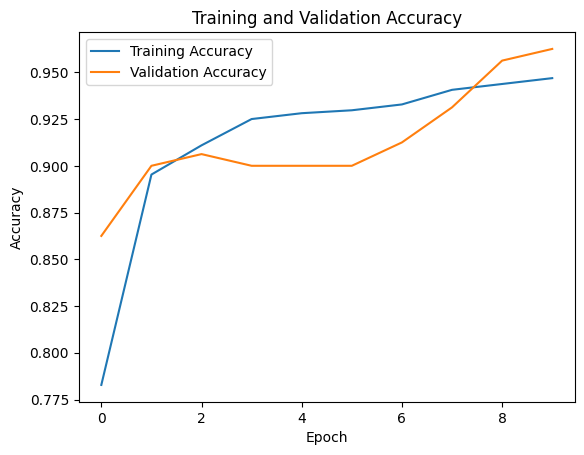

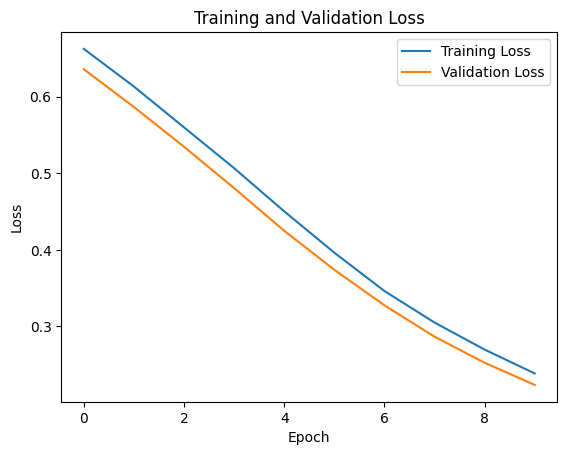

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

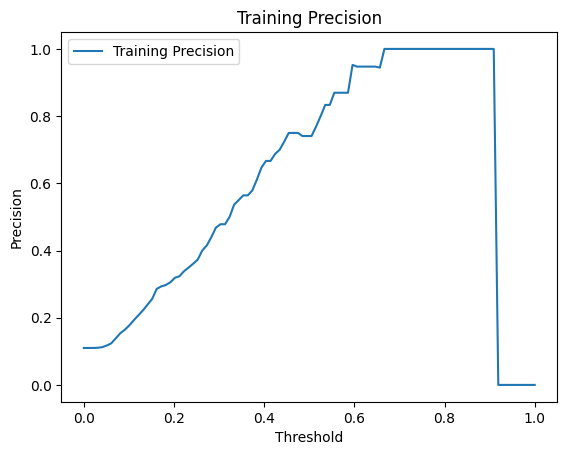

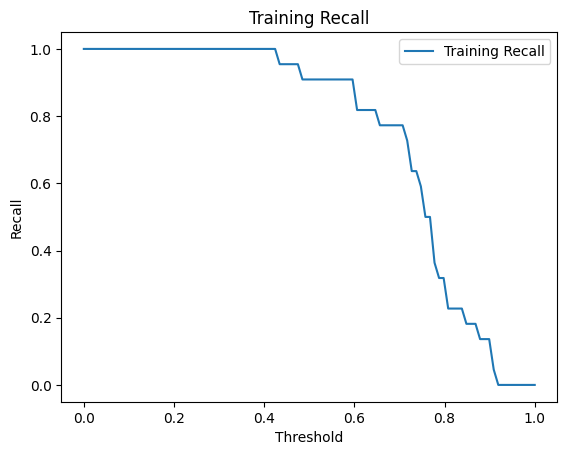

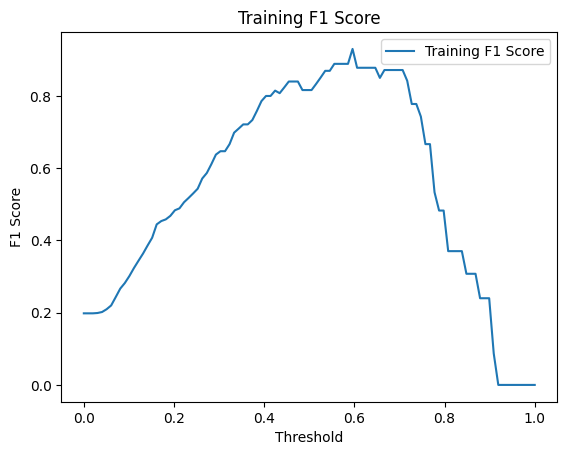

In [76]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import keras



n_splits = 5

for _ in range(n_splits):
    X, y = shuffle(X, y, random_state=np.random.randint(1000))
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=np.random.randint(1000))

    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Reshape the data for LSTM (assuming X_train_scaled and X_test_scaled are 2D arrays)
    X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
    X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

    # Build the hybrid model
    model = Sequential()
    model.add(LSTM(50, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model and get history
    history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

    # Evaluate the model on the test set
    y_pred_prob = model.predict(X_test_reshaped)
    y_pred = (y_pred_prob > 0.5).astype(int)

    # Calculate and print evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    print("\nTest Set Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")

    # Plot training and validation accuracy
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Plot training and validation loss
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Plot training and validation precision
    precision_values = [precision_score(y_test, (y_pred_prob > threshold).astype(int)) for threshold in np.linspace(0, 1, 100)]
    plt.plot(np.linspace(0, 1, 100), precision_values, label='Training Precision')
    plt.title('Training Precision')
    plt.xlabel('Threshold')
    plt.ylabel('Precision')
    plt.legend()
    plt.show()

    # Plot training and validation recall
    recall_values = [recall_score(y_test, (y_pred_prob > threshold).astype(int)) for threshold in np.linspace(0, 1, 100)]
    plt.plot(np.linspace(0, 1, 100), recall_values, label='Training Recall')
    plt.title('Training Recall')
    plt.xlabel('Threshold')
    plt.ylabel('Recall')
    plt.legend()
    plt.show()

    # Plot training and validation F1 score
    f1_values = [f1_score(y_test, (y_pred_prob > threshold).astype(int)) for threshold in np.linspace(0, 1, 100)]
    plt.plot(np.linspace(0, 1, 100), f1_values, label='Training F1 Score')
    plt.title('Training F1 Score')
    plt.xlabel('Threshold')
    plt.ylabel('F1 Score')
    plt.legend()
    plt.show()

7/7 [==============================] - 0s 3ms/step


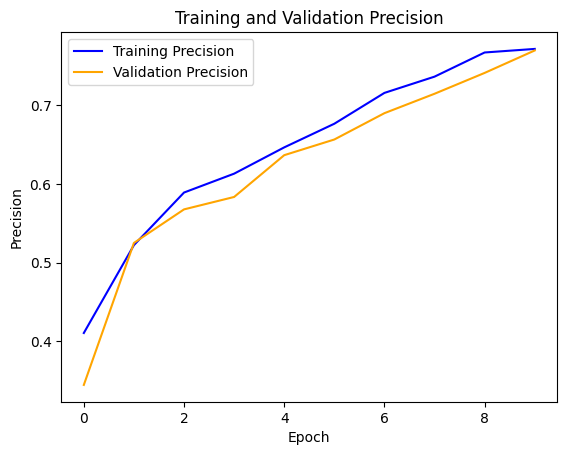

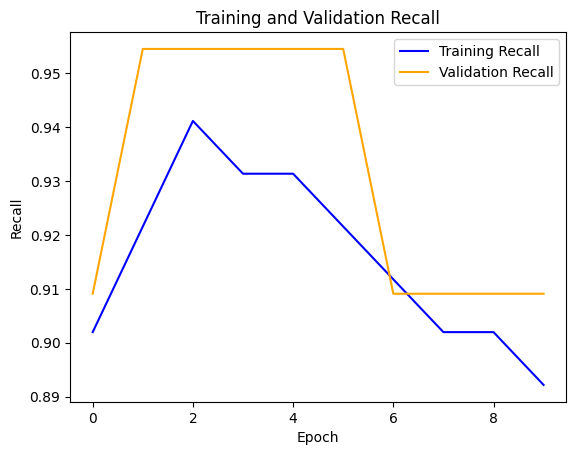

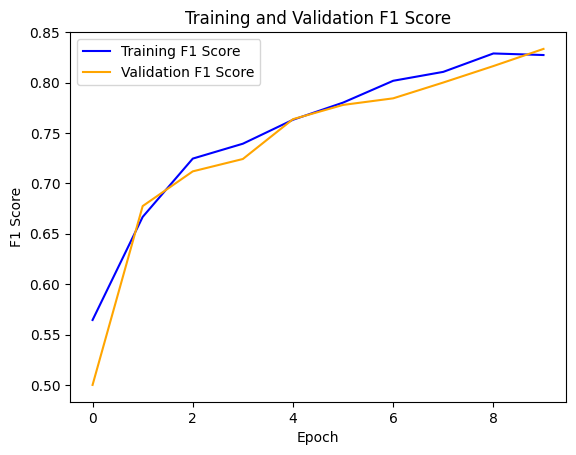

7/7 [==============================] - 0s 3ms/step


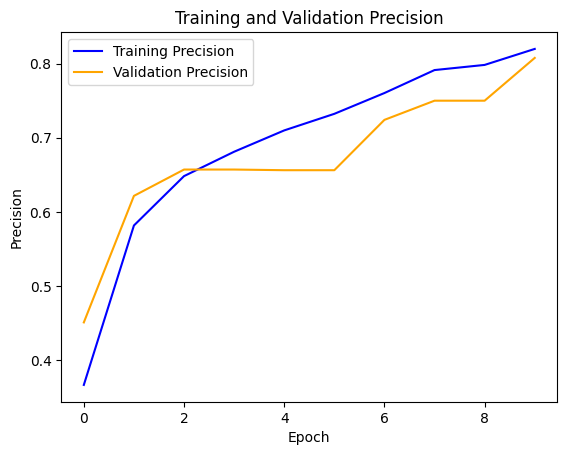

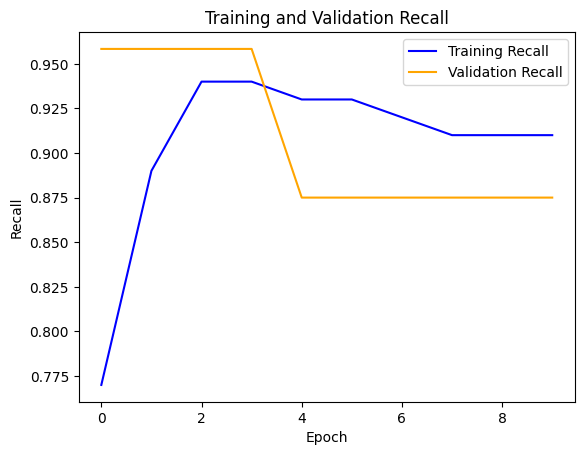

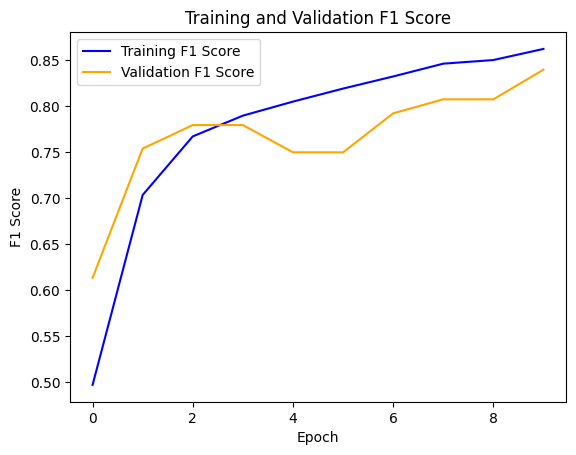

7/7 [==============================] - 0s 5ms/step


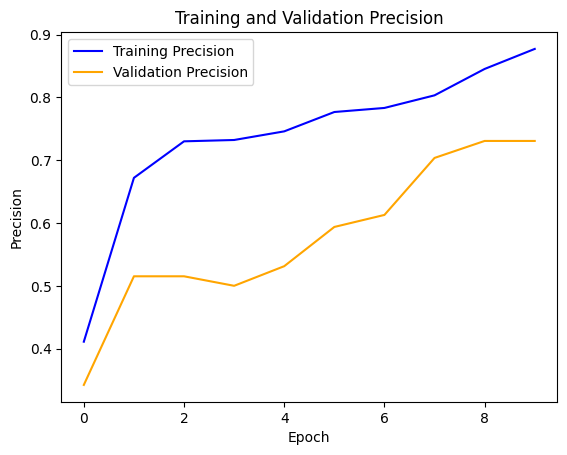

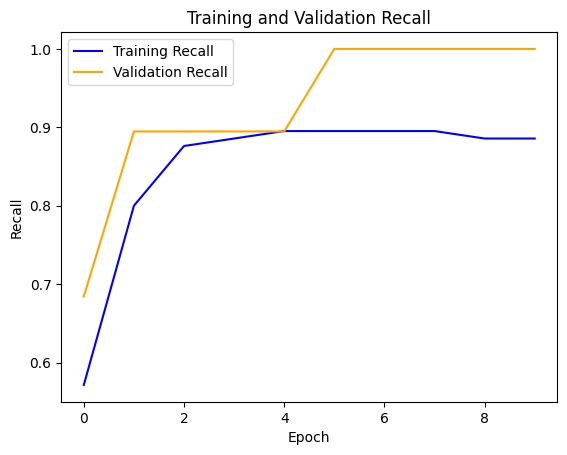

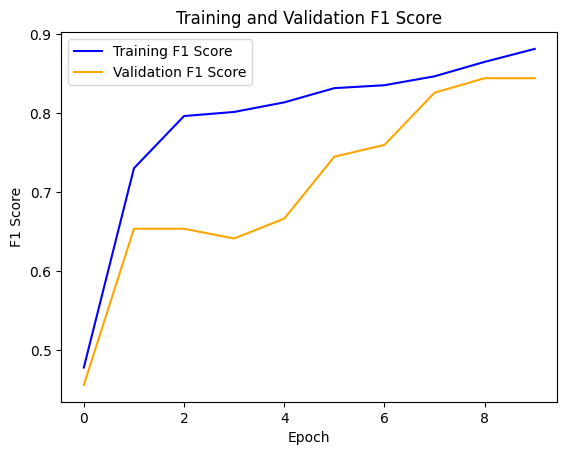

7/7 [==============================] - 0s 3ms/step


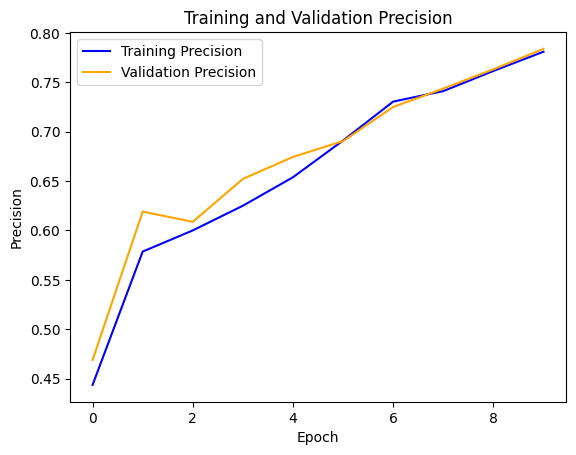

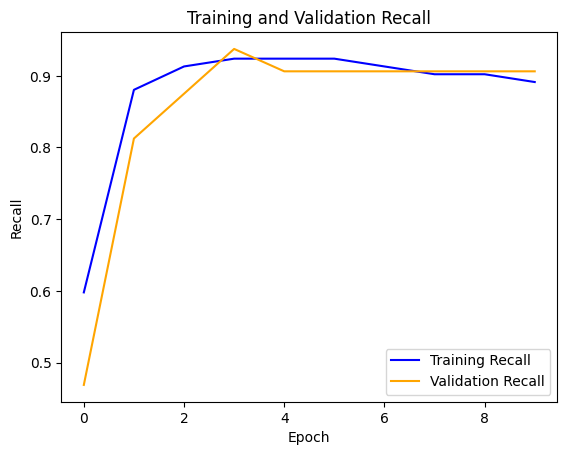

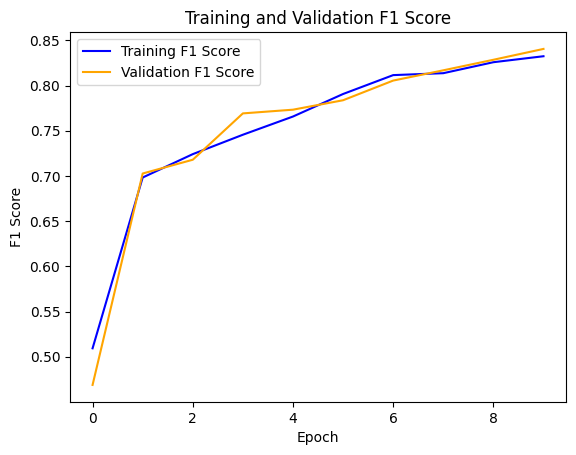

7/7 [==============================] - 0s 3ms/step


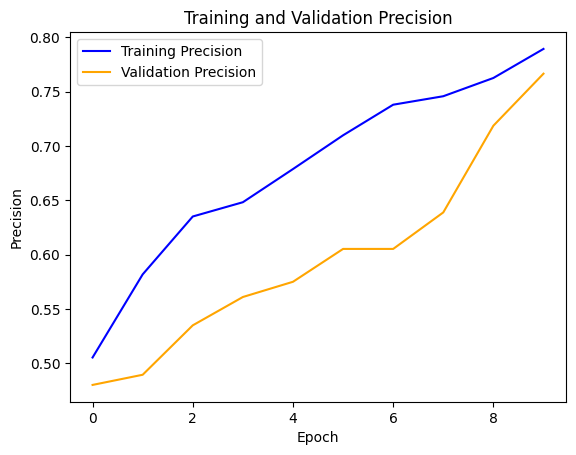

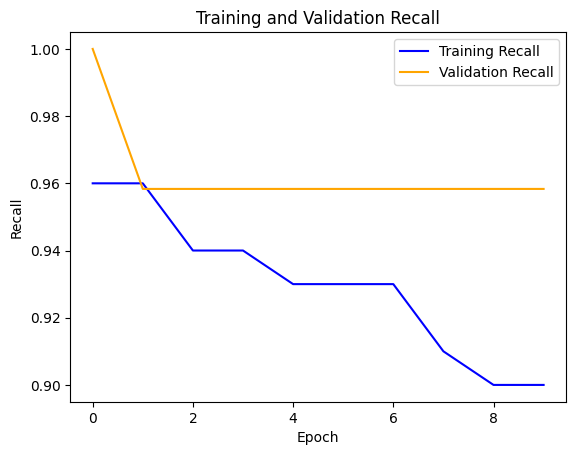

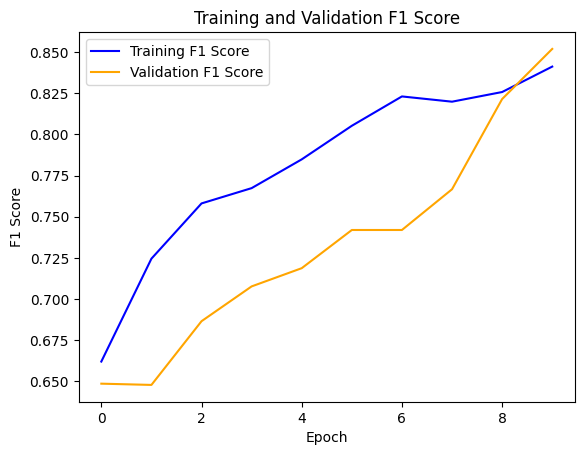

In [93]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import keras

n_splits = 5

for _ in range(n_splits):
    X, y = shuffle(X, y, random_state=np.random.randint(1000))
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=np.random.randint(1000))

    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Reshape the data for LSTM (assuming X_train_scaled and X_test_scaled are 2D arrays)
    X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
    X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

    # Build the hybrid model
    model = Sequential()
    model.add(LSTM(50, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Lists to store metrics for each epoch
    train_precision = []
    val_precision = []
    train_recall = []
    val_recall = []
    train_f1 = []
    val_f1 = []

    # Train the model and get history
    for epoch in range(10):
        history = model.fit(X_train_reshaped, y_train, epochs=1, batch_size=32, validation_split=0.2, verbose=1)

        # Calculate precision, recall, and F1 on training set
        y_train_pred = (model.predict(X_train_reshaped) > 0.5).astype(int)
        train_precision.append(precision_score(y_train, y_train_pred))
        train_recall.append(recall_score(y_train, y_train_pred))
        train_f1.append(f1_score(y_train, y_train_pred))

        # Calculate precision, recall, and F1 on validation set
        y_val_pred = (model.predict(X_test_reshaped) > 0.5).astype(int)
        val_precision.append(precision_score(y_test, y_val_pred))
        val_recall.append(recall_score(y_test, y_val_pred))
        val_f1.append(f1_score(y_test, y_val_pred))

    # Plot training and validation precision
    plt.plot(train_precision, label='Training Precision', color='blue')
    plt.plot(val_precision, label='Validation Precision', color='orange')
    plt.title('Training and Validation Precision')
    plt.xlabel('Epoch')
    plt.ylabel('Precision')
    plt.legend()
    plt.show()

    # Plot training and validation recall
    plt.plot(train_recall, label='Training Recall', color='blue')
    plt.plot(val_recall, label='Validation Recall', color='orange')
    plt.title('Training and Validation Recall')
    plt.xlabel('Epoch')
    plt.ylabel('Recall')
    plt.legend()
    plt.show()

    # Plot training and validation F1 score
    plt.plot(train_f1, label='Training F1 Score', color='blue')
    plt.plot(val_f1, label='Validation F1 Score', color='orange')
    plt.title('Training and Validation F1 Score')
    plt.xlabel('Epoch')
    plt.ylabel('F1 Score')
    plt.legend()
    plt.show()


In [94]:
import numpy as np
from sklearn.preprocessing import StandardScaler



# Generate random data for prediction (replace this with your actual random data)
random_data = np.random.rand(10, len(selected_features_optimized))  # 10 samples

# Scale the random data using the same scaler used during training
random_data_scaled = scaler.transform(random_data)

# Reshape the input data for LSTM
random_data_reshaped = random_data_scaled.reshape((random_data_scaled.shape[0], 1, random_data_scaled.shape[1]))

# Make predictions using the trained model
predictions_probs = model.predict(random_data_reshaped)
predictions_binary = (predictions_probs > 0.5).astype(int)

# Display the predictions
print("Predicted Probabilities:")
print(predictions_probs)

print("\nPredicted Binary Labels:")
print(predictions_binary)


1/1 [==============================] - 0s 29ms/step
Predicted Probabilities:
[[0.39002588]
 [0.39367497]
 [0.38053632]
 [0.5646943 ]
 [0.5171601 ]
 [0.3124675 ]
 [0.37990266]
 [0.37714174]
 [0.5018684 ]
 [0.53264165]]

Predicted Binary Labels:
[[0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
